In [1]:
import pandas as pd
import numpy as np

In [2]:
#Lecture de la base des données
df = pd.read_csv("df_final_dubai.csv")

# STATISTIQUES DESCRIPTIVES

In [3]:
df.head()

,Date,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,...,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,CO,NO2,SO2,O3,PM2.5,PM10,AQI,City
0,2024-01-01,25,23,23.75,71,53.25,19,11.4,0.0,10,...,1018,9.625,269.666667,16.775000,9.058333,83.083333,25.158333,68.591667,64.993683,Dubai
1,2024-01-02,24,22,23.25,67,50.25,28,16.8,0.0,10,...,1018,12.750,252.250000,14.841667,6.883333,87.250000,25.850000,64.383333,69.502499,Dubai
2,2024-01-03,24,21,22.25,63,47.25,21,12.6,0.0,9,...,1017,25.375,250.916667,17.187500,8.200000,80.541667,23.575000,64.666667,59.740902,Dubai
3,2024-01-04,24,22,23.25,67,50.25,37,22.2,0.0,10,...,1017,32.875,200.083333,9.270833,4.316667,86.916667,19.691667,46.479167,65.627639,Dubai
4,2024-01-05,23,21,21.75,60,45.00,18,10.8,0.0,10,...,1017,5.750,309.083333,25.420833,12.220833,77.916667,26.054167,51.237500,52.790759,Dubai


In [4]:
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,TEMP_MOY,HUMIDITY_MAX_PERCENT,HUMIDITY_EST_AVG,WINDSPEED_MAX_KMH,WINDSPEED_AVG_KMH,PRECIP_TOTAL_DAY_MM,SUNHOUR,SR_EST_W_m2,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,CO,NO2,SO2,O3,PM2.5,PM10,AQI
count,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,30.956284,26.103825,28.172814,60.598361,45.44877,21.696721,13.018033,0.144536,11.879781,1781.967213,1009.718579,8.191257,440.464026,39.488297,20.308971,93.878415,41.574146,111.040619,85.113722
std,5.864521,4.864198,5.206393,9.944773,7.45858,5.795448,3.477269,1.602536,1.659106,248.865831,7.989379,12.765182,124.290300,16.864561,7.917554,36.922825,14.593006,65.267470,25.554694
min,20.000000,17.000000,18.750000,36.000000,27.00000,9.000000,5.400000,0.000000,2.000000,300.000000,993.000000,0.000000,200.083333,8.775000,4.316667,15.916667,12.087500,18.508333,40.561111
25%,25.000000,21.000000,23.000000,54.000000,40.50000,18.000000,10.800000,0.000000,11.000000,1650.000000,1003.000000,0.156250,346.354167,27.672917,15.086458,66.677083,30.313542,63.401042,67.222812
50%,31.000000,26.000000,28.625000,60.000000,45.00000,21.000000,12.600000,0.000000,12.000000,1800.000000,1011.000000,3.250000,434.416667,38.150000,20.333333,86.666667,40.427083,91.708333,78.422812
75%,36.000000,31.000000,33.250000,67.000000,50.25000,25.000000,15.000000,0.000000,13.000000,1950.000000,1016.750000,9.906250,519.927083,48.171875,25.414583,116.479167,51.193750,143.017708,98.414063
max,42.000000,34.000000,36.750000,92.000000,69.00000,41.000000,24.600000,29.500000,14.000000,2100.000000,1024.000000,92.375000,1012.750000,113.358333,53.775000,210.583333,98.437500,374.762500,191.291810


In [5]:
df.isnull().sum()


Date                      0
MAX_TEMPERATURE_C         0
MIN_TEMPERATURE_C         0
TEMP_MOY                  0
HUMIDITY_MAX_PERCENT      0
HUMIDITY_EST_AVG          0
WINDSPEED_MAX_KMH         0
WINDSPEED_AVG_KMH         0
PRECIP_TOTAL_DAY_MM       0
SUNHOUR                   0
SR_EST_W_m2               0
PRESSURE_MAX_MB           0
CLOUDCOVER_AVG_PERCENT    0
CO                        0
NO2                       0
SO2                       0
O3                        0
PM2.5                     0
PM10                      0
AQI                       0
City                      0
dtype: int64

## Outliers

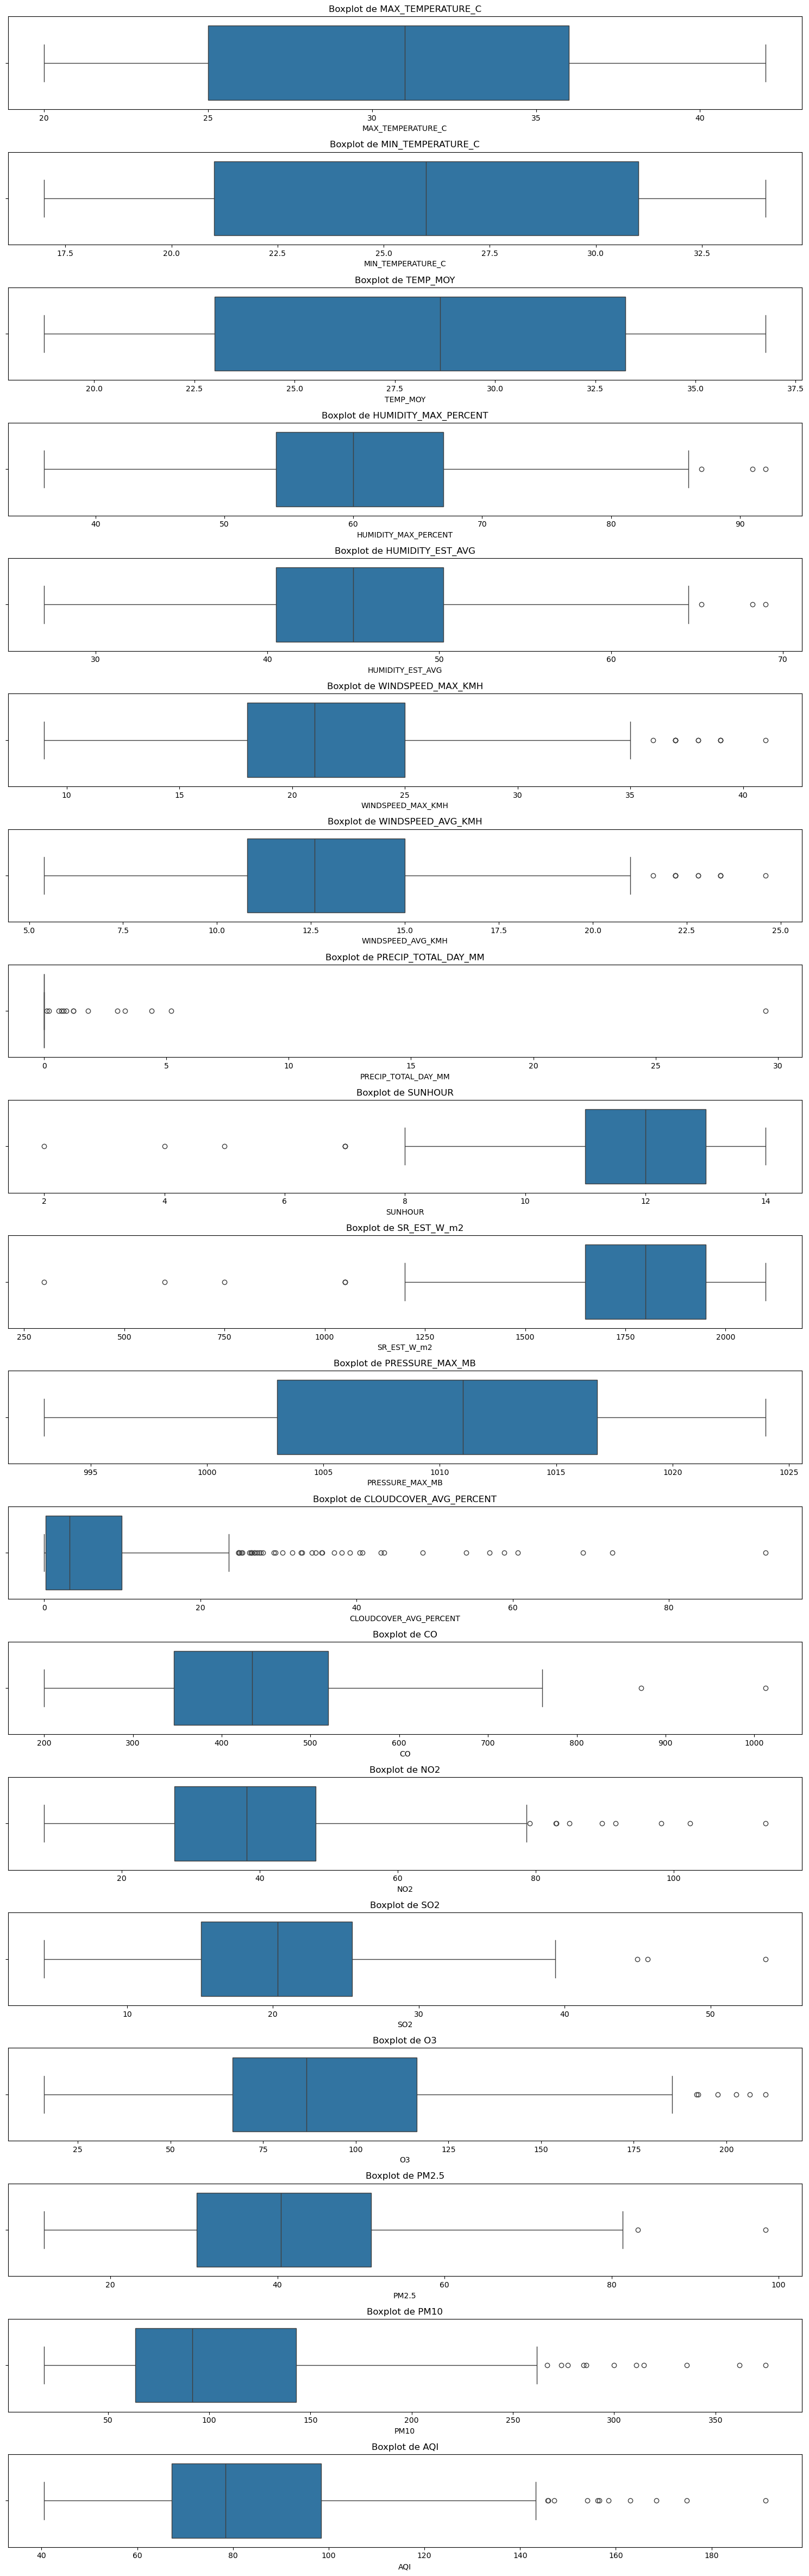

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

# Définir la taille de la figure pour les boxplots
plt.figure(figsize=(15, len(numeric_cols) * 2.5))

# Générer les boxplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

plt.show()

#### Traitement des valeurs extrêmes (outliers)
Dans cette étude, les valeurs extrêmes présentes dans les données n’ont pas été supprimées ni imputées. Cette décision repose sur le fait que, dans le contexte de la qualité de l’air, les outliers peuvent représenter des événements environnementaux réels et significatifs tels que des pics de pollution liés à des conditions météorologiques particulières, des épisodes de trafic intense ou d'autres incidents ponctuels. Les exclure reviendrait à ignorer des signaux critiques dans l’analyse. Afin de préserver l’intégrité des données et de refléter fidèlement leur variabilité naturelle, nous avons opté pour l’utilisation de modèles robustes (notamment la régression avec norme de Huber) qui permettent de limiter l’impact des valeurs extrêmes sans pour autant les écarter. Ce choix vise à assurer à la fois la validité scientifique de l’analyse et la pertinence opérationnelle des résultats, notamment pour la détection et l’interprétation des épisodes de pollution atypiques.


## Distribution des variables

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns

# Définir la taille de la figure
n_cols = 3
n_rows = int(np.ceil(len(numeric_columns) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Créer un histogramme avec courbe de densité pour chaque variable
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

# Supprimer les axes vides si le nombre de variables < nombre de sous-graphiques
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Corrélation entre les variables

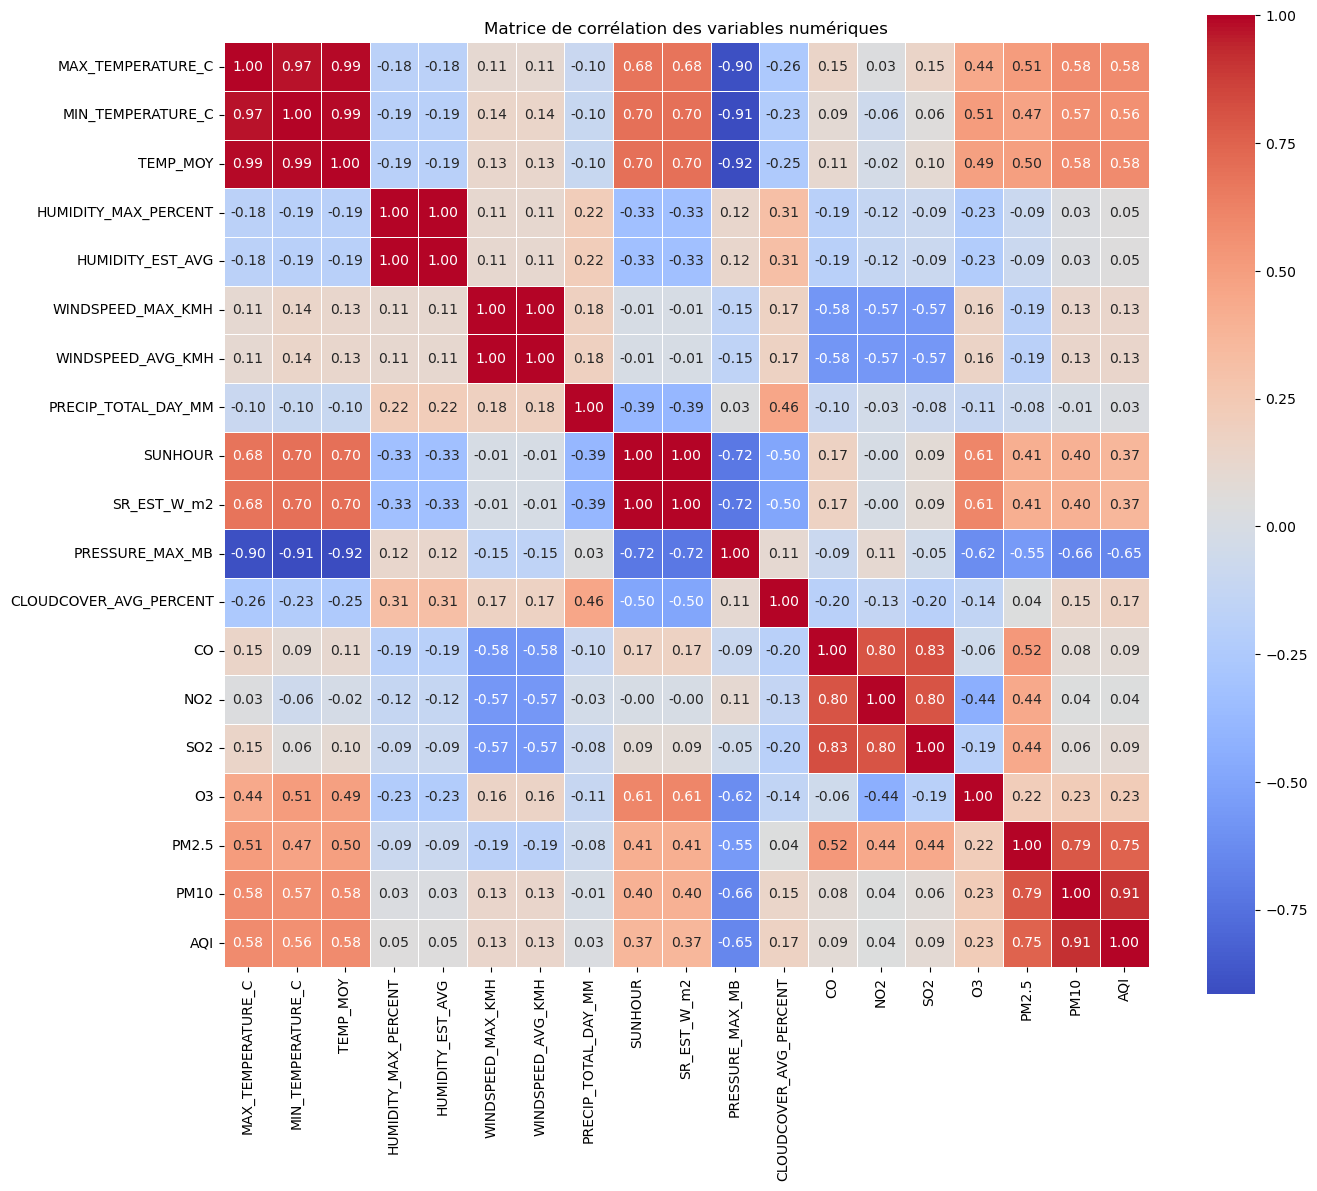

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Définir la taille de la figure
plt.figure(figsize=(14, 12))

# Créer une heatmap avec annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()


In [ ]:
# Transformation de la variable cible (log AQI)
df['log_AQI'] = np.log(df['AQI'] + 1)


In [ ]:
print(df.columns)

Index(['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'TEMP_MOY',
       'HUMIDITY_MAX_PERCENT', 'HUMIDITY_EST_AVG', 'WINDSPEED_MAX_KMH',
       'WINDSPEED_AVG_KMH', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'SR_EST_W_m2',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'CO', 'NO2', 'SO2', 'O3',
       'PM2.5', 'PM10', 'AQI', 'City', 'log_AQI'],
      dtype='object')


In [ ]:
df['log_AQI'] = df['log_AQI'].astype(float)

In [ ]:
df['log_AQI_lag1'] = df['log_AQI'].shift(1)
df.dropna(inplace=True)  # pour enlever la première ligne avec NaN


## Corrélations entre AQI et les autres variables

In [ ]:
# Corrélations avec AQI uniquement (triées)
corr_with_aqi = correlation_matrix[['AQI']].sort_values(by='AQI', ascending=False)

# Identification des couples de variables très fortement corrélées (> 0.8), en excluant la diagonale
high_corr_pairs = []
threshold = 0.8
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            high_corr_pairs.append((var1, var2, corr_value))

# Conversion en DataFrame pour affichage
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Corrélation'])

print("Corrélations avec AQI (triées) :")
print(corr_with_aqi)

print("\nPaires de variables très fortement corrélées (> 0.8) :")#ce sont des cas potentiels de multicolinéarité, à surveiller dans les modèles linéaires.
print(high_corr_df)

Corrélations avec AQI (triées) :
                             AQI
AQI                     1.000000
PM10                    0.913929
PM2.5                   0.752318
MAX_TEMPERATURE_C       0.584340
TEMP_MOY                0.583033
MIN_TEMPERATURE_C       0.564064
SR_EST_W_m2             0.370025
SUNHOUR                 0.370025
O3                      0.225355
CLOUDCOVER_AVG_PERCENT  0.171980
WINDSPEED_AVG_KMH       0.134652
WINDSPEED_MAX_KMH       0.134652
SO2                     0.093258
CO                      0.085522
HUMIDITY_EST_AVG        0.045446
HUMIDITY_MAX_PERCENT    0.045446
NO2                     0.040886
PRECIP_TOTAL_DAY_MM     0.026185
PRESSURE_MAX_MB        -0.652626

Paires de variables très fortement corrélées (> 0.8) :
              Variable 1         Variable 2  Corrélation
0      MAX_TEMPERATURE_C  MIN_TEMPERATURE_C     0.970381
1      MAX_TEMPERATURE_C           TEMP_MOY     0.990464
2      MAX_TEMPERATURE_C    PRESSURE_MAX_MB    -0.899708
3      MIN_TEMPERATURE_

In [ ]:
# Conversion de la date au bon forma
df['Date'] = pd.to_datetime(df['Date'])
# Création des variables temporelles
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['weekday'] = df['Date'].dt.weekday
df['week'] = df['Date'].dt.isocalendar().week
df['year'] = df['Date'].dt.year
df['TimeIndex'] = np.arange(len(df))

# Optionnel : ajouter une variable "saison"
def get_season(month):
    if month in [12, 1, 2]:
        return 'hiver'
    elif month in [3, 4, 5]:
        return 'printemps'
    elif month in [6, 7, 8]:
        return 'été'
    else:
        return 'automne'

df['saison'] = df['month'].apply(get_season)
df = pd.get_dummies(df, columns=['saison'], drop_first=True)

In [ ]:
df.columns

Index(['Date', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'TEMP_MOY',
       'HUMIDITY_MAX_PERCENT', 'HUMIDITY_EST_AVG', 'WINDSPEED_MAX_KMH',
       'WINDSPEED_AVG_KMH', 'PRECIP_TOTAL_DAY_MM', 'SUNHOUR', 'SR_EST_W_m2',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'CO', 'NO2', 'SO2', 'O3',
       'PM2.5', 'PM10', 'AQI', 'City', 'log_AQI', 'day', 'month', 'weekday',
       'week', 'year', 'TimeIndex', 'saison_hiver', 'saison_printemps',
       'saison_été'],
      dtype='object')

# ECONOMETRIE

In [ ]:
# 📦 Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, normal_ad

In [ ]:
# Sélection des variables explicatives
# ✅ Variables explicatives sélectionnées selon la littérature et la corrélation avec log_AQI
features = ['PM2.5',
            #'PM10',
            #'CO', 
            'SO2' ,
            #'NO2',
            #'Benzène',
            #'PRESSURE_MAX_MB',
            #'SUNHOUR',                 
            #'SR_EST_W_m2' ,            
            #'Toluène',                 
            'HUMIDITY_MAX_PERCENT',   
            #'HUMIDITY_EST_AVG',       
            #'MAX_TEMPERATURE_C',      
            'TEMP_MOY',               
            #'MIN_TEMPERATURE_C',      
            'PRECIP_TOTAL_DAY_MM',    
            'O3',                     
            'WINDSPEED_MAX_KMH',     
            #'WINDSPEED_AVG_KMH',      
            'CLOUDCOVER_AVG_PERCENT',
            #'weekday',
            #'month',
            
            'TimeIndex',
            'saison_hiver', 
            'saison_printemps',
            'saison_été',

            'log_AQI_lag1',
]
X = df[features]
X = X.loc[:, ~X.columns.duplicated()]  # Supprimer les colonnes dupliquées
X = X.astype(float)  # ← important
X = sm.add_constant(X)
y = df['log_AQI']



✅ RÉSUMÉ DU MODÈLE ROBUSTE (RLM - Huber)
                    Robust linear Model Regression Results                    
Dep. Variable:                log_AQI   No. Observations:                  365
Model:                            RLM   Df Residuals:                      351
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 13 Jul 2025                                         
Time:                        01:42:33                                         
No. Iterations:                    33                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

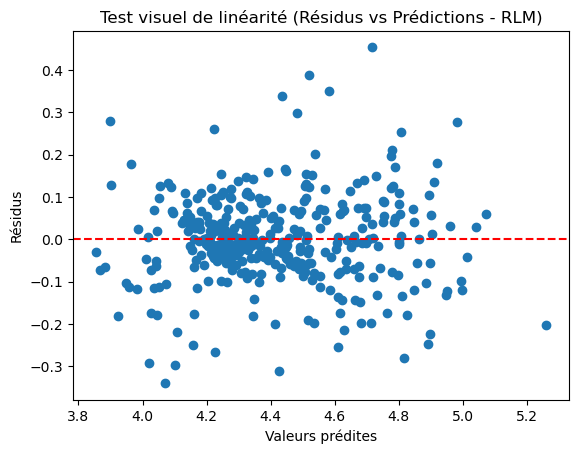


📊 VIF - Facteurs d'inflation de la variance
                  Variable         VIF
0                    const  753.766832
1                    PM2.5    2.635592
2                      SO2    2.539971
3     HUMIDITY_MAX_PERCENT    1.253854
4                 TEMP_MOY    5.956335
5      PRECIP_TOTAL_DAY_MM    1.385256
6                       O3    1.804665
7        WINDSPEED_MAX_KMH    1.748228
8   CLOUDCOVER_AVG_PERCENT    1.754720
9                TimeIndex    1.967762
10            saison_hiver    4.589191
11        saison_printemps    3.161095
12              saison_été    3.492237
13            log_AQI_lag1    2.405135

📊 Indépendance des erreurs - Durbin-Watson
Durbin-Watson statistic : 1.938 (idéal proche de 2)


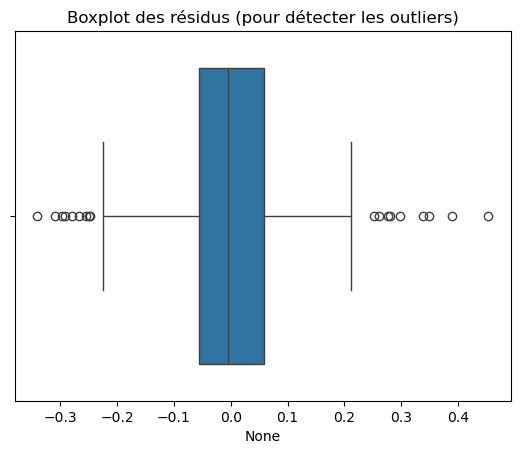

R² (pseudo) du modèle RLM : 0.7743


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

def verifier_rlm_robuste(X, y):
    # Ajout de la constante
    X_const = sm.add_constant(X)
    
    # Estimation du modèle RLM avec norme de Huber
    model_rlm = sm.RLM(y, X_const, M=sm.robust.norms.HuberT())
    results_rlm = model_rlm.fit()

    # Résumé
    print("\n✅ RÉSUMÉ DU MODÈLE ROBUSTE (RLM - Huber)")
    print(results_rlm.summary())
    
    # 1. Graphique Résidus vs Prédictions (linéarité)
    plt.figure()
    plt.scatter(results_rlm.fittedvalues, results_rlm.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Résidus")
    plt.title("Test visuel de linéarité (Résidus vs Prédictions - RLM)")
    plt.show()

    # 2. VIF - Multicolinéarité
    print("\n📊 VIF - Facteurs d'inflation de la variance")
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
    print(vif_data)

    # 3. Durbin-Watson (Indépendance des erreurs)
    print("\n📊 Indépendance des erreurs - Durbin-Watson")
    dw_stat = durbin_watson(results_rlm.resid)
    print(f"Durbin-Watson statistic : {dw_stat:.3f} (idéal proche de 2)")

    # 4. Boxplot des résidus (détection d’outliers)
    plt.figure()
    sns.boxplot(x=results_rlm.resid)
    plt.title("Boxplot des résidus (pour détecter les outliers)")
    plt.show()

    return results_rlm
verifier_rlm_robuste(X, y)

# y : variable observée (log_AQI)
# y_pred : prédictions du modèle RLM
# y.mean() : moyenne des valeurs observées

ss_total = np.sum((y - y.mean())**2)
ss_residual = np.sum((y - y_pred)**2)
r2_robust = 1 - (ss_residual / ss_total)

print(f"R² (pseudo) du modèle RLM : {r2_robust:.4f}")


In [ ]:
# Affiche les types de chaque colonne
print(df.dtypes)

# Liste uniquement les colonnes qui ne sont pas numériques
non_numeriques = df.select_dtypes(exclude=['int64', 'float64']).columns
print("\nColonnes non numériques à corriger :", list(non_numeriques))


Date                      datetime64[ns]
MAX_TEMPERATURE_C                  int64
MIN_TEMPERATURE_C                  int64
TEMP_MOY                         float64
HUMIDITY_MAX_PERCENT               int64
HUMIDITY_EST_AVG                 float64
WINDSPEED_MAX_KMH                  int64
WINDSPEED_AVG_KMH                float64
PRECIP_TOTAL_DAY_MM              float64
SUNHOUR                            int64
SR_EST_W_m2                        int64
PRESSURE_MAX_MB                    int64
CLOUDCOVER_AVG_PERCENT           float64
CO                               float64
NO2                              float64
SO2                              float64
O3                               float64
PM2.5                            float64
PM10                             float64
AQI                              float64
City                              object
log_AQI                          float64
day                                int32
month                              int32
weekday         

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"MAE : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

MAE : 0.1016
RMSE : 0.1326


Plus ces valeurs sont **proches de 0**, **mieux le modèle prédit**.
Ici, les erreurs sont **petites**, donc le modèle est **plutôt bon**.


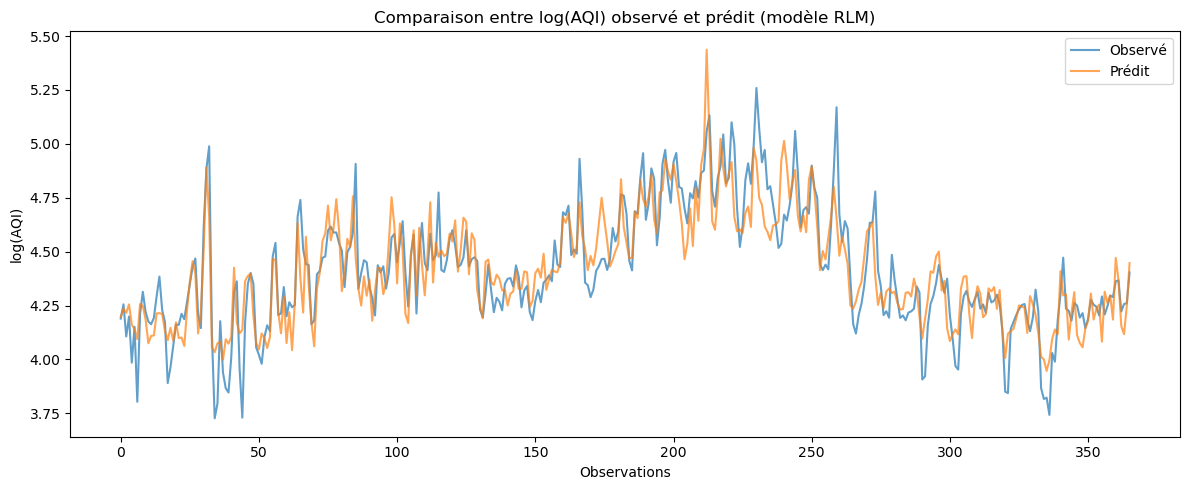

In [ ]:
# Prédictions du modèle RLM
y_pred = model_rlm.fittedvalues
y_true = y

# Créer un DataFrame pour tracer les courbes
comparison_df = pd.DataFrame({
    'log_AQI_observé': y_true,
    'log_AQI_prédit': y_pred
})

# Tracer les courbes
plt.figure(figsize=(12, 5))
plt.plot(comparison_df['log_AQI_observé'].values, label='Observé', alpha=0.7)
plt.plot(comparison_df['log_AQI_prédit'].values, label='Prédit', alpha=0.7)
plt.title("Comparaison entre log(AQI) observé et prédit (modèle RLM)")
plt.xlabel("Observations")
plt.ylabel("log(AQI)")
plt.legend()
plt.tight_layout()
plt.show()